# 데이터 사이언스 팀프로젝트

## 이어서 2022년도 추출한 데이터 사용

In [1]:
import pandas as pd
import seaborn as sns

df_sales = pd.read_csv('./2022_data/df_sales.csv', header = 0, encoding ="cp949")
df_store = pd.read_csv('./2022_data/df_store.csv', header = 0, encoding ="cp949")
df_person_live = pd.read_csv('./2022_data/df_person_live.csv', header = 0, encoding ="cp949")
df_person_act = pd.read_csv('./2022_data/df_person_act.csv', header = 0, encoding ="cp949")
df_incom_consum = pd.read_csv('./2022_data/df_incom_consum.csv', header = 0, encoding ="cp949")
df_apt = pd.read_csv('./2022_data/df_apt.csv', header = 0, encoding ="cp949")
df_person_job = pd.read_csv('./2022_data/df_person_job.csv', header = 0, encoding ="cp949")
df_zip = pd.read_csv('./2022_data/df_zip.csv', header = 0, encoding ="cp949")

In [2]:
df_area = pd.read_csv('./서울시 상권분석서비스_2022년도 상권 자료/서울시 상권분석서비스(상권영역).csv', header = 0, encoding ="cp949")

## 연관이 직접적으로 있어보이는 데이터
- 점포와 매출 추론 (+상권의 소득 소비 수준)
- 인구에 대한 정보(상주,생활,직장)  

이 정도인 것 같다.

## 각 데이터 파일에 있는 상권 코드의 종류
- 상권 영역에 따르면 총 서울시에 존재하는 총 상권 코드는 1671종류임. df_area파일의 상권코드의 value count 값이 1671

In [5]:
print('매출 추론 상권 코드 수:',len(df_sales['상권_코드'].value_counts()))
print('상주 인구 상권 코드 수:',len(df_person_live['상권_코드'].value_counts()))
print('생활 인구 상권 코드 수:',len(df_person_act['상권_코드'].value_counts()))
print('소득 소비 상권 코드 수:',len(df_incom_consum['상권_코드'].value_counts()))
print('아파트 상권 코드 수:',len(df_apt['상권_코드'].value_counts()))
print('총 상권 코드 수:',len(df_area['상권_코드'].value_counts()))
print('상점 상권 코드 수:',len(df_store['상권_코드'].value_counts()))
print('직장 인구 상권 코드 수:',len(df_person_job['상권_코드'].value_counts()))
print('집객 시설 상권 코드 수:',len(df_zip['상권_코드'].value_counts()))
#상권코드_종류 -> 1671개임.

매출 추론 상권 코드 수: 1650
상주 인구 상권 코드 수: 1636
생활 인구 상권 코드 수: 1669
소득 소비 상권 코드 수: 1630
아파트 상권 코드 수: 1483
총 상권 코드 수: 1671
상점 상권 코드 수: 1665
직장 인구 상권 코드 수: 1630
집객 시설 상권 코드 수: 1575


## 매출 추론 + 점포
- 상권마다 존재하는 점포의 종류에 따른 매출 추론 데이터 병합(기준분기코드,상권코드,서비스업종코드를 기준으로 병합)  

In [6]:
store_sales_merge = pd.merge(df_store, df_sales,how='outer',on=['기준_년_코드','기준_분기_코드','상권_구분_코드','상권_구분_코드_명',
                                                                '상권_코드','상권_코드_명','서비스_업종_코드','서비스_업종_코드_명'])

In [7]:
store_sales_merge.to_csv("./2022_data/store_sales_merge.csv",index = False,encoding ="cp949")

## 각종 인구에 대한 정보
- 상주 인구, 생활 인구, 직장 인구의 데이터를 통합할 생각이다.  

원래는 소득 소비 수준도 넣을 생각이었다.  
> 추가적으로 말하자면 상권-소득소비는 상권의 소득 소비 수준을 알려주는 지표이다.  

이래서 위의 3가지 데이터만 병합하기로 했다.

In [8]:
live_act_job_merge = pd.merge(df_person_act, df_person_live,how='outer',on=['기준_년_코드','기준_분기_코드','상권_구분_코드'
                                                                                  ,'상권_구분_코드_명','상권_코드','상권_코드_명',])
live_act_job_merge = pd.merge(live_act_job_merge, df_person_job,how='outer',on=['기준_년_코드','기준_분기_코드','상권_구분_코드'
                                                                                 ,'상권_구분_코드_명','상권_코드','상권_코드_명',])

In [9]:
live_act_job_merge = live_act_job_merge.sort_values(by=['기준_년_코드', '기준_분기_코드', '상권_코드'])
live_act_job_merge = live_act_job_merge.reset_index(drop=True)

In [10]:
live_act_job_merge.to_csv("./2022_data/live_act_job_merge.csv", index=False, encoding="cp949")

## 데이터의 개수가 비슷한 것들끼리 병합시켜도 될 것같다는 생각이 들어서 소득 소비까지 병합한 데이터 파일을 만들자.

In [11]:
live_act_job_incom_merge=pd.merge(live_act_job_merge, df_incom_consum,how='outer',on=['기준_년_코드','기준_분기_코드','상권_구분_코드'
                                                                                 ,'상권_구분_코드_명','상권_코드','상권_코드_명',])
live_act_job_incom_merge.to_csv("./2022_data/live_act_job_incom_merge.csv",index = False,encoding ="cp949")

In [12]:
#마찬가지로 집객시설과 아파트도 합쳐주자
per_zip_merge=pd.merge(live_act_job_incom_merge, df_zip,how='outer',on=['기준_년_코드','기준_분기_코드','상권_구분_코드'
                                                                                 ,'상권_구분_코드_명','상권_코드','상권_코드_명',])
per_zip_merge.to_csv("./2022_data/per_zip_merge.csv",index = False,encoding ="cp949")

In [13]:
per_zip_apt_merge=pd.merge(per_zip_merge, df_apt,how='outer',on=['기준_년_코드','기준_분기_코드','상권_구분_코드'
                                                                                 ,'상권_구분_코드_명','상권_코드','상권_코드_명',])
per_zip_apt_merge.to_csv("./2022_data/per_zip_apt_merge.csv",index = False,encoding ="cp949")

## 상권 코드기준 | 상권에 대한 정보. 
- 상권 코드에만 맞춰서 데이터 통합을 해보는 것.

### 먼저 상권에서 점포의 종류에 관계없이 매출로만 생각을 한다고 한다면..
- 분기별로 각각의 상권의 매출의 총합을 구하도록 하자.  

> groupby와 sum함수를 이용해서 분기와 상권코드가 같은 행의 매출값을 모두 더해준다.

In [14]:
area_code_sort = df_area.sort_values(by=['상권_코드']).reset_index()
area_code_sort = pd.DataFrame(area_code_sort['상권_코드'])

먼저 분기별 각 상권의 매출의 총합을 구하자.

In [15]:
sales_sum = df_sales.groupby(['기준_년_코드','기준_분기_코드','상권_구분_코드'
                              ,'상권_구분_코드_명','상권_코드','상권_코드_명']).sum().reset_index()

C:\Users\chlgh\AppData\Local\Temp\ipykernel_14148\1622024338.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_sum = df_sales.groupby(['기준_년_코드','기준_분기_코드','상권_구분_코드'


마찬 가지로 분기별 각 상권의 아파트 단지수, 세대수에 대한 총합을 구하자.

In [16]:
apt_sum = df_apt.groupby(['기준_년_코드','기준_분기_코드','상권_구분_코드'
                              ,'상권_구분_코드_명','상권_코드','상권_코드_명']).sum().reset_index()

그러고 분기별로 모든 상권 코드가 존재하는 데이터 프레임과 병합한 후 다시 합쳐준다.

In [17]:
sales_1 = sales_sum[sales_sum['기준_분기_코드']==1]
sales_2 = sales_sum[sales_sum['기준_분기_코드']==2]
sales_3 = sales_sum[sales_sum['기준_분기_코드']==3]
sales_4 = sales_sum[sales_sum['기준_분기_코드']==4]
#상권별 매출의 합을 분기별로 나누기.

apt_1 = apt_sum[apt_sum['기준_분기_코드']==1]
apt_2 = apt_sum[apt_sum['기준_분기_코드']==2]
apt_3 = apt_sum[apt_sum['기준_분기_코드']==3]
apt_4 = apt_sum[apt_sum['기준_분기_코드']==4]
#상권별 아파트 단지, 세대수의 합을 분기별로 나누기.

sales_1 = pd.merge(area_code_sort, sales_1,how='outer',on='상권_코드')
sales_2 = pd.merge(area_code_sort, sales_2,how='outer',on='상권_코드')
sales_3 = pd.merge(area_code_sort, sales_3,how='outer',on='상권_코드')
sales_4 = pd.merge(area_code_sort, sales_4,how='outer',on='상권_코드')
#각 분기별로 데이터프레임과 병합해준다.

apt_1 = pd.merge(sales_1, apt_1,how='outer',on=['상권_코드','기준_년_코드','기준_분기_코드','상권_구분_코드','상권_구분_코드_명','상권_코드_명'])
apt_2 = pd.merge(sales_2, apt_2,how='outer',on=['상권_코드','기준_년_코드','기준_분기_코드','상권_구분_코드','상권_구분_코드_명','상권_코드_명'])
apt_3 = pd.merge(sales_3, apt_3,how='outer',on=['상권_코드','기준_년_코드','기준_분기_코드','상권_구분_코드','상권_구분_코드_명','상권_코드_명'])
apt_4 = pd.merge(sales_4, apt_4,how='outer',on=['상권_코드','기준_년_코드','기준_분기_코드','상권_구분_코드','상권_구분_코드_명','상권_코드_명'])
#각 분기별로 데이터프레임과 병합해준다.

sales_sum = pd.concat([sales_4,sales_3,sales_2,sales_1])
#분기별 각 상권의 매출총합.

apt_sales_sum = pd.concat([apt_1,apt_2,apt_3,apt_4])
#분기별 각 상권의 매출,아파트단지,세대수의 총합.

In [18]:
#분기별 각 상권의 매출 합.
sales_sum.to_csv("./2022_data/sales_sum.csv",index = False,encoding ="cp949")

In [19]:
#분기별 각 상권의 매출,아파트단지,세대수의 총합.
apt_sales_sum.to_csv("./2022_data/apt_sales_sum.csv",index = False,encoding ="cp949")

위의 데이터에서 조심해야할 부분은 비율이다.  
매출의 비율부분은 고려하지 않고 더한 값이기에 전체의 값에서 다시 구해줘야할 수 있다.

## 각 상권의 요식업의 매출 총액 구하기.
- 각 상권에서 업종 구분코드를 통해서 요식업의 매출 총액을 구하도록 하자.

In [3]:
food_code_list = ['CS100001','CS100002','CS100003','CS100004','CS100005'
                  ,'CS100006','CS100007','CS100008','CS100009','CS100010']
df_food_sales = df_sales[df_sales['서비스_업종_코드'].isin(food_code_list)]

In [4]:
df_food_sales = df_food_sales.sort_values(by = ['기준_분기_코드','상권_코드']).reset_index(drop=True)

In [44]:
df_food_sales.to_csv("./2022_data/df_food_sales.csv",index = False,encoding ="cp949")

## shp파일 이용해서 상권구획도 그리기

In [5]:
import folium
import geopandas as gpd

# SHP 파일 로드
shapefile_path = './한국부동산원_상업용부동산 임대동향조사_전국 17개시도 상권 구획도_20210831/market_area_21_312.shp'
data = gpd.read_file(shapefile_path)

# 지도 중심 좌표 설정
center = [data.centroid.y.mean(), data.centroid.x.mean()]

# Folium 지도 객체 생성
m = folium.Map(location=center, zoom_start=10)

# SHP 데이터를 GeoJSON 형식으로 변환하여 Folium에 추가
folium.GeoJson(data).add_to(m)

# 지도를 HTML 파일로 저장
m.save('map.html')


## 대학가별 상권 분류 데이터 파일 불러오기

In [4]:
df_uni = pd.read_csv('./2022_data/서울시_대학가_상권_분류.csv', header = 0, encoding ="cp949")

대학가별 상권, 분기별 각 상권의 매출 합, 데이터 병합.  
일단 outer로 병합을 해주고나서,  
학교이름이 nan인 데이터는 제거해주도록 하자.

In [13]:
df_sales_sum = pd.read_csv('./2022_data/sales_sum.csv', header = 0, encoding ="cp949")
#df_sales에서부터 다시 시작해야할 듯. df_sales데이터로 각 상권별 총점포수구하기
df_zum = df_sales[['기준_년_코드','기준_분기_코드','상권_구분_코드','상권_구분_코드_명','상권_코드','상권_코드_명','점포수']]

In [14]:
df_zum = df_zum[df_zum['점포수']!='*']
df_zum['점포수'] = df_zum['점포수'].astype(int)
zum_sum = df_zum.groupby(['기준_년_코드','기준_분기_코드','상권_구분_코드'
                              ,'상권_구분_코드_명','상권_코드','상권_코드_명']).sum().reset_index()

In [15]:
zum_sum.to_csv("./2022_data/zum_sum.csv",index = False,encoding ="cp949")

In [7]:
uni_sales_merge = pd.merge(df_uni, df_sales_sum, how='outer',on=['상권_코드'])
uni_sales_merge = pd.merge(uni_sales_merge, zum_sum, how='outer',on=['기준_년_코드','기준_분기_코드','상권_구분_코드'
                              ,'상권_구분_코드_명','상권_코드','상권_코드_명'])

In [8]:
#특정행(NAN) 현재 대학 상권에 포함되지 않는 상권 제거해주기
uni_sales_merge = uni_sales_merge.dropna(subset=['학교'], how='any', axis=0)

In [9]:
#groupby를 이용한 학교, 분기, 기준년 코드에 따른 정렬.
uni_sales_group = uni_sales_merge.sort_values(by=['기준_년_코드','기준_분기_코드','학교'])
uni_sales_group = pd.DataFrame(uni_sales_group)

In [14]:
#분기별 점포당 평균매출 구하기.
uni_sales_group['분기별_점포당_평균_매출'] = round(uni_sales_group['분기당_매출_금액'] / uni_sales_group['점포수'])
uni_sales_group['분기별_점포당_평균_매출_건수'] = round(uni_sales_group['분기당_매출_건수'] / uni_sales_group['점포수'])
uni_sales_group['분기별_건수당_평균_금액'] = round(uni_sales_group['분기당_매출_금액'] / uni_sales_group['분기당_매출_건수'])

In [15]:
uni_sales_group.to_csv("./2022_data/uni_sales_group.csv",index = False,encoding ="cp949")

추정매출 파일에 상권코드조차 없는 대학은 제외하도록 하자..?

## 분기별 각 대학가 상권의 요식업 매출.  
- 요식업종의 매출 파일 df_food_sales.csv를 사용해서 구해준다음에 병합해주자.  



In [5]:
food_sales_sum = df_food_sales.groupby(['기준_년_코드','기준_분기_코드','상권_구분_코드'
                              ,'상권_구분_코드_명','상권_코드','상권_코드_명']).sum().reset_index()

C:\Users\chlgh\AppData\Local\Temp\ipykernel_23320\955459603.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  food_sales_sum = df_food_sales.groupby(['기준_년_코드','기준_분기_코드','상권_구분_코드'


In [6]:
food_sales_sum.to_csv("./2022_data/food_sales_sum.csv",index = False,encoding ="cp949")

분기별 상권의 요식업 매출의 총합을 구했으니, 이제 대학 상권과 연결해서 쓰면 되겠다.

In [8]:
uni_food_merge = pd.merge(df_uni, food_sales_sum, how='outer',on=['상권_코드'])
#특정행(NAN) 현재 대학 상권에 포함되지 않는 상권 제거해주기
uni_food_merge = uni_food_merge.dropna(subset=['학교'], how='any', axis=0)
#groupby를 이용한 학교, 분기, 기준년 코드에 따른 정렬.
uni_food_group = uni_food_merge.sort_values(by=['기준_년_코드','기준_분기_코드','학교'])
uni_food_group = pd.DataFrame(uni_food_group)
uni_food_group.to_csv("./2022_data/uni_food_group.csv",index = False,encoding ="cp949")

## 대학 상권 별 점포수 붙여서 점포의 각 분기당 매출 평균 데이터

## 상관관계 파악하기
- 서로 상관관계가 있는 것이 무엇인지 파악을 해보자고.  

일단, 분기, 상권 코드별로 확인 하는 것이 옳다고 생각된다.  
발달상권 = 매출, 상주인구, 생활인구, 직장인구.  
아니면
> 매출과 상주인구  
> 매출과 생활인구  
> 매출과 직장인구  

이렇게 상관관계를 보고, 매출과 상주인구, 생활인구, 직장인구의 상관관계를 보도록하자.  
사실 이미 구분된 상권을 통해 회귀 분석을 시키는 것인데, 그러면 상권 구분 명을 차례대로 숫자로 바꿔주고,  
분석을 진행하도록 하자.  
>많은 데이터가 필요할 수도 있으니 원래 데이터로 한번, 대학 상권의 데이터로 한번 해보도록 합시다.  
예상은 생활인구, 직장인구에 양의 상관관계를 띄고 상주인구와도 관련은 있겠지만, outlier가 존재할 듯 합니다.(산점도도 보도록합시다.)


# 비상상황 발생
- 큰일났다. 상주인구가 비아파트 가구수인 것 같다. 아파트 가구 수는 따지지 않은 것일까? 잘 모르겠다

# ++데이터수가 너무 많아서 또 안되는 듯하다.

## 상관관계가 있는 특징을 찾아내기전에 판단을 위한 정확한 새로운 기준을 만들어내야 할 듯.
- 추정 매출의 경우에는 거진 상관관계가 있는 특징이 없다.  
- 이상할 정도로 상관관계 계수가 안나옴.  

말 그대로 여러가지가 요인이 되어서 매출이 나오는 것이므로 일단 상권의 매출을 점포수로 나눠준다음에 해보도록 하자.

## 서로 상관관계가 있는 특징 찾아내기.
- 생활 인구수, 상주 인구수, 직장 인구수, 점포수

In [3]:
df_sales_sum = pd.read_csv('./2022_data/sales_sum.csv', header = 0, encoding ="cp949")
df_zum_sum =  pd.read_csv('./2022_data/zum_sum.csv', header = 0, encoding ="cp949")

df_merge = pd.merge(df_sales_sum, df_person_live,how='outer',on=['기준_년_코드','기준_분기_코드','상권_구분_코드','상권_구분_코드_명',
                                                                '상권_코드','상권_코드_명'])
df_merge = pd.merge(df_merge, df_person_act,how='outer',on=['기준_년_코드','기준_분기_코드','상권_구분_코드','상권_구분_코드_명',
                                                                '상권_코드','상권_코드_명'])
df_merge = pd.merge(df_merge, df_person_job,how='outer',on=['기준_년_코드','기준_분기_코드','상권_구분_코드','상권_구분_코드_명',
                                                                '상권_코드','상권_코드_명'])
df_merge = pd.merge(df_merge, df_zum_sum,how='outer',on=['기준_년_코드','기준_분기_코드','상권_구분_코드','상권_구분_코드_명',
                                                                '상권_코드','상권_코드_명'])
df_merge = pd.merge(df_merge,df_incom_consum ,how='outer',on=['기준_년_코드','기준_분기_코드','상권_구분_코드','상권_구분_코드_명',
                                                                '상권_코드','상권_코드_명'])
df_merge = pd.merge(df_merge,df_zip ,how='outer',on=['기준_년_코드','기준_분기_코드','상권_구분_코드','상권_구분_코드_명',
                                                                '상권_코드','상권_코드_명'])

df_merge = df_merge.dropna(subset=['점포수'], how='any', axis=0)
df_merge = df_merge[df_merge['점포수']!='*']

In [8]:
'''
상주인구 인덱스 = ['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '총_상주인구_수',
       '남성_상주인구_수', '여성_상주인구_수', '연령대_10_상주인구_수', '연령대_20_상주인구_수',
       '연령대_30_상주인구_수', '연령대_40_상주인구_수', '연령대_50_상주인구_수', '연령대_60_이상_상주인구_수',
       '남성연령대_10_상주인구_수', '남성연령대_20_상주인구_수', '남성연령대_30_상주인구_수',
       '남성연령대_40_상주인구_수', '남성연령대_50_상주인구_수', '남성연령대_60_이상_상주인구_수',
       '여성연령대_10_상주인구_수', '여성연령대_20_상주인구_수', '여성연령대_30_상주인구_수',
       '여성연령대_40_상주인구_수', '여성연령대_50_상주인구_수', '여성연령대_60_이상_상주인구_수', '총_가구_수',
       '아파트_가구_수', '비_아파트_가구_수', '상권_코드_명']
       
추정매출 인덱스 = ["기준_년_코드","기준_분기_코드","상권_구분_코드","상권_구분_코드_명","상권_코드","상권_코드_명",
"서비스_업종_코드","서비스_업종_코드_명","분기당_매출_금액","분기당_매출_건수","주중_매출_비율","주말_매출_비율",
"월요일_매출_비율","화요일_매출_비율","수요일_매출_비율","목요일_매출_비율","금요일_매출_비율","토요일_매출_비율",
"일요일_매출_비율","시간대_00~06_매출_비율","시간대_06~11_매출_비율","시간대_11~14_매출_비율","시간대_14~17_매출_비율",
"시간대_17~21_매출_비율","시간대_21~24_매출_비율","남성_매출_비율","여성_매출_비율","연령대_10_매출_비율",
"연령대_20_매출_비율","연령대_30_매출_비율","연령대_40_매출_비율","연령대_50_매출_비율","연령대_60_이상_매출_비율",
"주중_매출_금액","주말_매출_금액","월요일_매출_금액","화요일_매출_금액","수요일_매출_금액","목요일_매출_금액",
"금요일_매출_금액","토요일_매출_금액","일요일_매출_금액","시간대_00~06_매출_금액","시간대_06~11_매출_금액",
"시간대_11~14_매출_금액","시간대_14~17_매출_금액","시간대_17~21_매출_금액","시간대_21~24_매출_금액","남성_매출_금액",
"여성_매출_금액","연령대_10_매출_금액","연령대_20_매출_금액","연령대_30_매출_금액","연령대_40_매출_금액",
"연령대_50_매출_금액","연령대_60_이상_매출_금액","주중_매출_건수","주말_매출_건수","월요일_매출_건수","화요일_매출_건수",
"수요일_매출_건수","목요일_매출_건수","금요일_매출_건수","토요일_매출_건수","일요일_매출_건수","시간대_건수~06_매출_건수",
"시간대_건수~11_매출_건수","시간대_건수~14_매출_건수","시간대_건수~17_매출_건수","시간대_건수~21_매출_건수",
"시간대_건수~24_매출_건수","남성_매출_건수","여성_매출_건수","연령대_10_매출_건수","연령대_20_매출_건수",
"연령대_30_매출_건수","연령대_40_매출_건수","연령대_50_매출_건수","연령대_60_이상_매출_건수","점포수"]


직장인구 인덱스 =["기준_년월_코드","기준_분기_코드","상권_구분_코드","상권_구분_코드_명","상권_코드","상권_코드_명",
"총_직장_인구_수","남성_직장_인구_수","여성_직장_인구_수","연령대_10_직장_인구_수","연령대_20_직장_인구_수",
"연령대_30_직장_인구_수","연령대_40_직장_인구_수","연령대_50_직장_인구_수","연령대_60_이상_직장_인구_수",
"남성연령대_10_직장_인구_수","남성연령대_20_직장_인구_수","남성연령대_30_직장_인구_수","남성연령대_40_직장_인구_수",
"남성연령대_50_직장_인구_수","남성연령대_60_이상_직장_인구_수","여성연령대_10_직장_인구_수","여성연령대_20_직장_인구_수",
"여성연령대_30_직장_인구_수","여성연령대_40_직장_인구_수","여성연령대_50_직장_인구_수","여성연령대_60_이상_직장_인구_수"]

생활인구 인덱스 =["기준 년코드","기준_분기_코드","상권_구분_코드"," 상권_구분_코드_명","상권_코드","상권_코드_명",
"총_생활인구_수","남성_생활인구_수","여성_생활인구_수", "연령대_10_생활인구_수","연령대_20_생활인구_수",
"연령대_30_생활인구_수","연령대_40_생활인구_수","연령대_50_생활인구_수","연령대_60_이상_생활인구_수",
"시간대_1_생활인구_수","시간대_2_생활인구_수","시간대_3_생활인구_수","시간대_4_생활인구_수","시간대_5_생활인구_수",
"시간대_6_생활인구_수","월요일_생활인구_수","화요일_생활인구_수","수요일_생활인구_수","목요일_생활인구_수",
"금요일_생활인구_수","토요일_생활인구_수","일요일_생활인구_수", 
남성연령대별(10~60) 요일시간대(1~6)별 생활인구 수 , 여성연령대별(10~60) 요일시간대(1~6)별 생활인구 수 ]

'''

In [4]:
cols = ['분기당_매출_금액','총_상주인구_수','총_생활인구_수','총_직장_인구_수','점포수','월_평균_소득_금액','소득_구간_코드'
       ,'지출_총금액','집객시설_수']
df_merge = df_merge[cols]

In [5]:
df_merge['점포당_평균_매출_금액'] = round(df_merge['분기당_매출_금액']/df_merge['점포수'])

In [7]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [33]:
cols = ['분기당_매출_금액','총_상주인구_수','총_생활인구_수','총_직장_인구_수','점포수','월_평균_소득_금액','소득_구간_코드'
       ,'지출_총금액','집객시설_수','점포당_평균_매출_금액']
df_test = df_merge[cols].dropna()

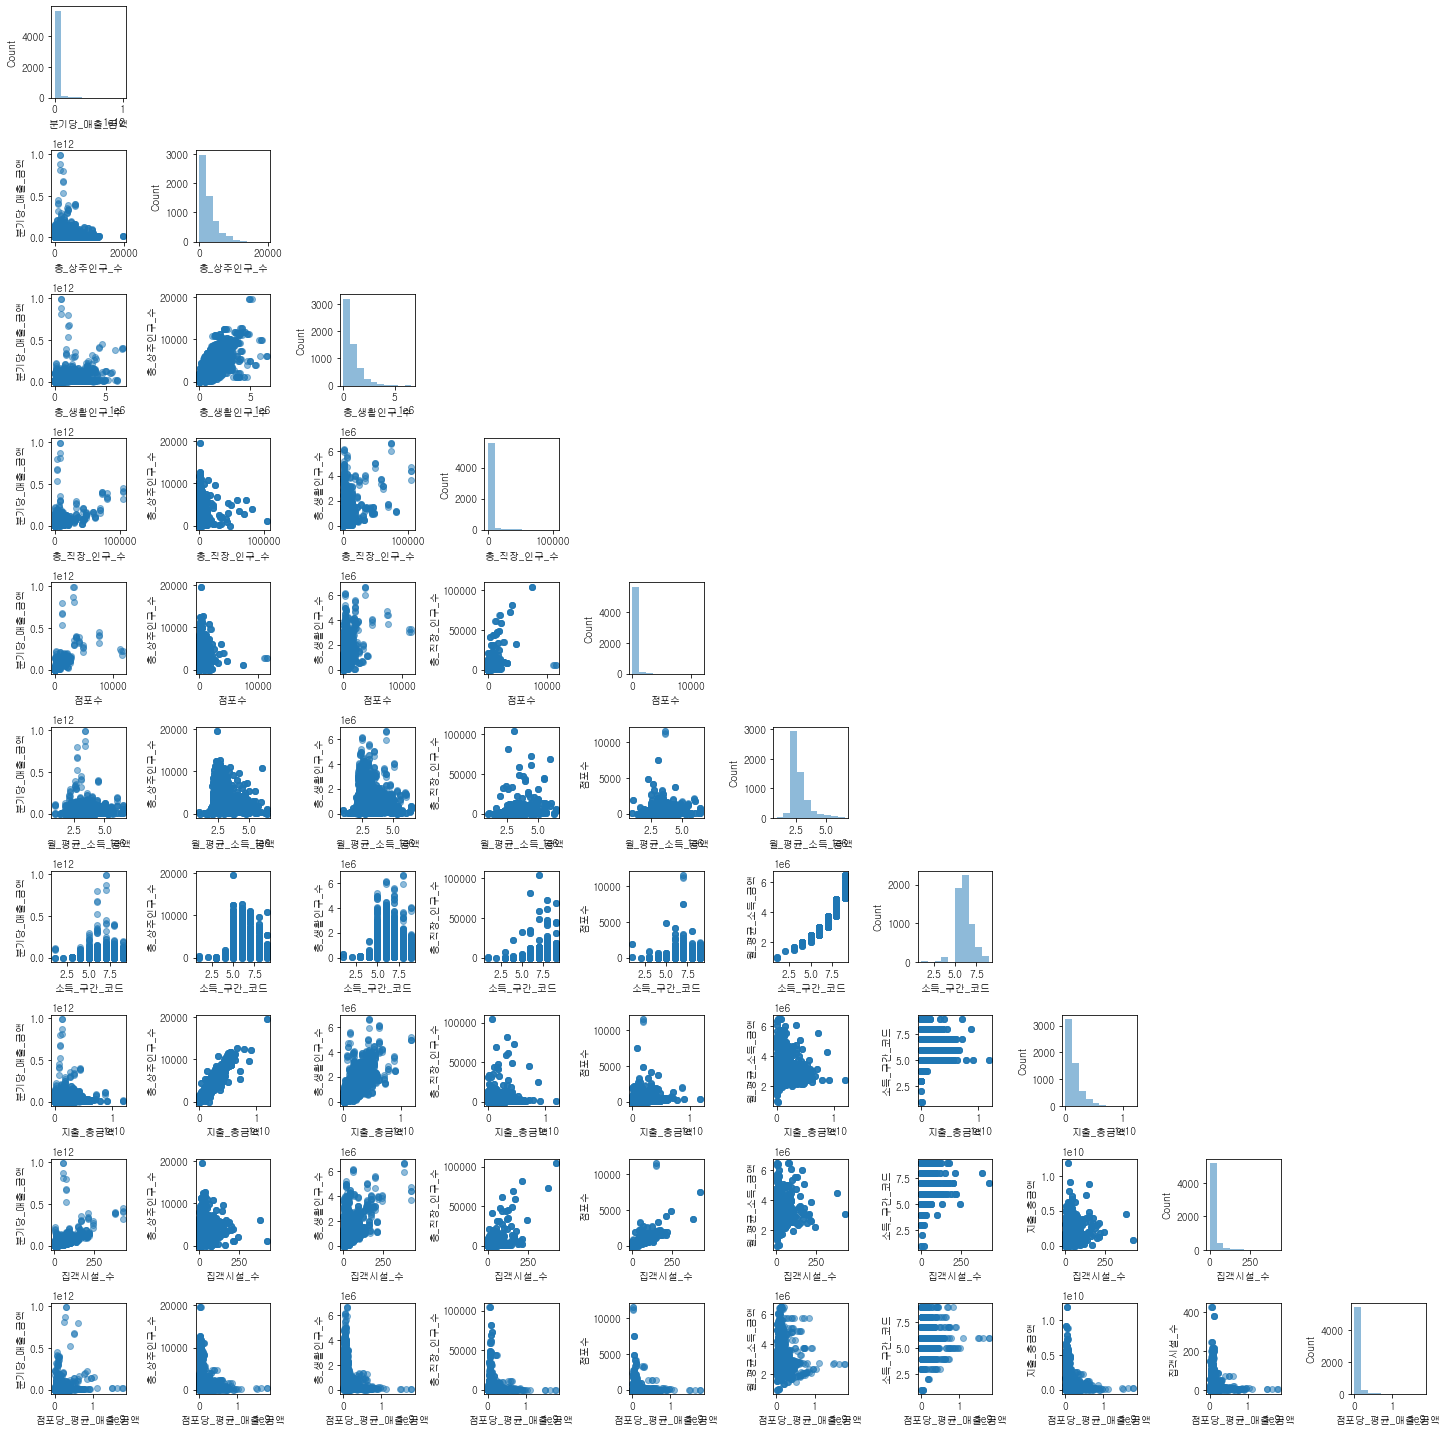

In [34]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

scatterplotmatrix(df_test.values, figsize=(20, 20), 
                  names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

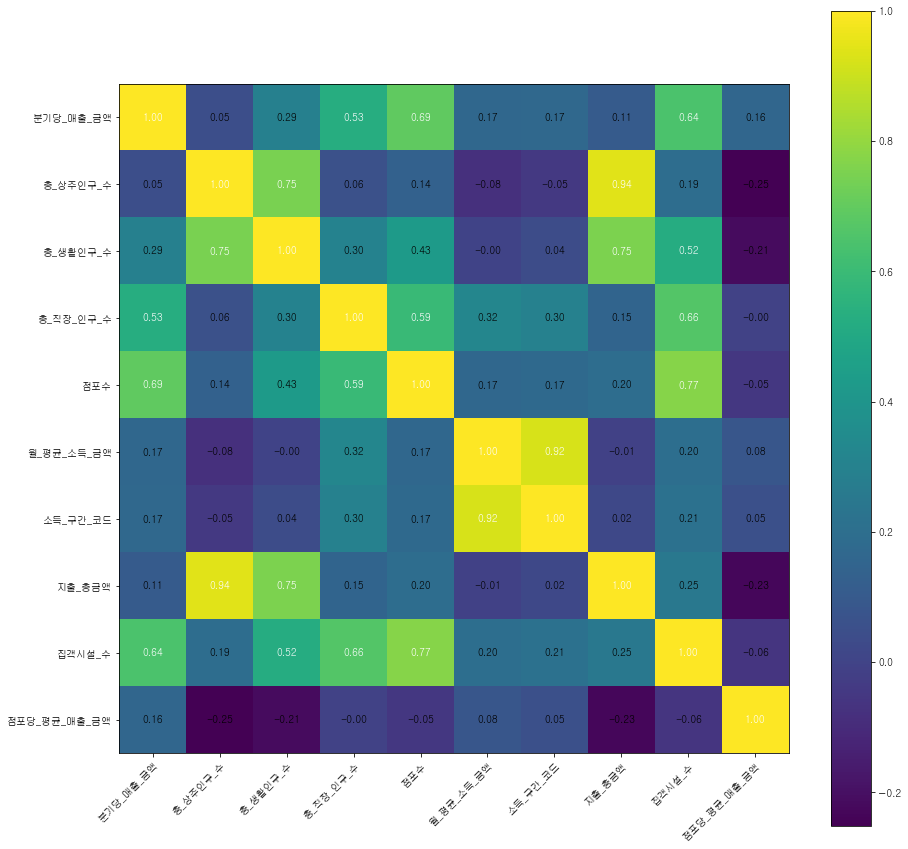

In [37]:
import numpy as np
from mlxtend.plotting import heatmap

cm = np.corrcoef(df_test.values.T)
hm = heatmap(cm, row_names=cols, column_names=cols, figsize = (15,15))

plt.show()

### 선형회귀 구현

In [45]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [46]:
X = df_test[['점포수']].values
y = df_test['분기당_매출_금액'].values

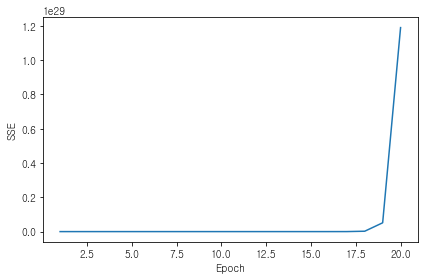

In [47]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

lr = LinearRegressionGD()
lr.fit(X_std, y_std)

plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

In [48]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

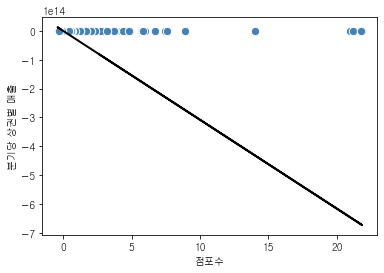

In [49]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('점포수')
plt.ylabel('분기당 상권별 매출')
plt.show()

### 모델평가

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_test.iloc[:, :-1].values
y = df_test['분기당_매출_금액'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [54]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

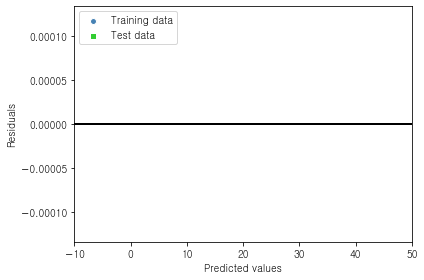

In [55]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

## 상주 인구로 분석을 할 때 주의점
- 상권의 소득 소비 수준이 인구 수와 관계가 있을 수도 있지만, 주변에 아파트의 갯수, 아파트의 가격에 따라  
> 상주하는 인구의 경제 수준
- 변할 수도 있으니 그 부분도 관계를 한번 보자.

## 본래의 인구수에 따른 매출액을 학습시킨후에 예측을 시켜보도록 하자.

In [ ]:
#상권 코드별 총 


## 분기당 각 상권의 요일 매출 비율, 이런것들을 다시 계산해서 집어넣어야할 듯 합니다.
- uni_sales_group.csv 데이터파일을 보면 비율데이터가 모두 합쳐져있습니다.

옆에 분기당 요일별 총매출도 나와있으니 그것을 이용해서 작업해주도록 합시다.

In [52]:
df_sales_sum = pd.read_csv('./2022_data/uni_sales_group.csv', header = 0, encoding ="cp949")
df_sales_sum = df_sales_sum.dropna(subset=['주중_매출_금액'], how='any', axis=0)

In [53]:
df_sales_sum['주중_매출_금액']==df_sales_sum['월요일_매출_금액']+df_sales_sum['화요일_매출_금액']+df_sales_sum['수요일_매출_금액']+df_sales_sum['목요일_매출_금액']+df_sales_sum['금요일_매출_금액']
df_sales_sum['주말_매출_금액']==df_sales_sum['토요일_매출_금액']+df_sales_sum['일요일_매출_금액']

df_sales_sum['주중_매출_비율'] =round((df_sales_sum['주중_매출_금액']/df_sales_sum['분기당_매출_금액'])*100)
df_sales_sum['주말_매출_비율'] = round((df_sales_sum['주말_매출_금액']/df_sales_sum['분기당_매출_금액'])*100)
df_sales_sum['월요일_매출_비율'] = round((df_sales_sum['월요일_매출_금액']/df_sales_sum['분기당_매출_금액'])*100)
df_sales_sum['화요일_매출_비율'] = round((df_sales_sum['화요일_매출_금액']/df_sales_sum['분기당_매출_금액'])*100)
df_sales_sum['수요일_매출_비율'] = round((df_sales_sum['수요일_매출_금액']/df_sales_sum['분기당_매출_금액'])*100)
df_sales_sum['목요일_매출_비율'] = round((df_sales_sum['목요일_매출_금액']/df_sales_sum['분기당_매출_금액'])*100)
df_sales_sum['금요일_매출_비율'] = round((df_sales_sum['금요일_매출_금액']/df_sales_sum['분기당_매출_금액'])*100)
df_sales_sum['토요일_매출_비율'] = round((df_sales_sum['토요일_매출_금액']/df_sales_sum['분기당_매출_금액'])*100)
df_sales_sum['일요일_매출_비율'] = round((df_sales_sum['일요일_매출_금액']/df_sales_sum['분기당_매출_금액'])*100)

In [55]:
df_sales_sum['분기당_매출_금액'] == df_sales_sum['시간대_00~06_매출_금액']+df_sales_sum['시간대_06~11_매출_금액']+df_sales_sum['시간대_11~14_매출_금액']+df_sales_sum['시간대_14~17_매출_금액']+df_sales_sum['시간대_17~21_매출_금액']+df_sales_sum['시간대_21~24_매출_금액']
df_sales_sum['시간대_00~06_매출_비율'] = round((df_sales_sum['시간대_00~06_매출_금액']/df_sales_sum['분기당_매출_금액'])*100)
df_sales_sum['시간대_06~11_매출_비율'] = round((df_sales_sum['시간대_06~11_매출_금액']/df_sales_sum['분기당_매출_금액'])*100)
df_sales_sum['시간대_11~14_매출_비율'] = round((df_sales_sum['시간대_11~14_매출_금액']/df_sales_sum['분기당_매출_금액'])*100)
df_sales_sum['시간대_14~17_매출_비율'] = round((df_sales_sum['시간대_14~17_매출_금액']/df_sales_sum['분기당_매출_금액'])*100)
df_sales_sum['시간대_17~21_매출_비율'] = round((df_sales_sum['시간대_17~21_매출_금액']/df_sales_sum['분기당_매출_금액'])*100)
df_sales_sum['시간대_21~24_매출_비율'] = round((df_sales_sum['시간대_21~24_매출_금액']/df_sales_sum['분기당_매출_금액'])*100)

+ 데이터에 어떻게 계산한지는 모르겠는 점이 있다. 분기당_매출금액과 각 특징의 총합값이 다를 때가 있다.  
> 지금 같은 경우에는, 남녀 매출금액의 합, 연령대별 매출 금액의 합이 분기당_매출_금액과 다르다.

원래는 같아야 할 것이 다르다. 하지만 매출비율은 구해놓도록 하자.

In [56]:
df_sales_sum['분기당_매출_금액'] == df_sales_sum['남성_매출_금액']+df_sales_sum['여성_매출_금액'] 
df_sales_sum['남성_매출_비율'] = round((df_sales_sum['남성_매출_금액']/(df_sales_sum['남성_매출_금액']+df_sales_sum['여성_매출_금액']))*100)
df_sales_sum['여성_매출_비율'] = round((df_sales_sum['여성_매출_금액']/(df_sales_sum['남성_매출_금액']+df_sales_sum['여성_매출_금액']))*100)

In [57]:
df_sales_sum['분기당_매출_금액'] == df_sales_sum['연령대_10_매출_금액']+df_sales_sum['연령대_20_매출_금액']+df_sales_sum['연령대_30_매출_금액']+df_sales_sum['연령대_40_매출_금액']+df_sales_sum['연령대_50_매출_금액']+df_sales_sum['연령대_60_이상_매출_금액']
age_sum = df_sales_sum['연령대_10_매출_금액']+df_sales_sum['연령대_20_매출_금액']+df_sales_sum['연령대_30_매출_금액']+df_sales_sum['연령대_40_매출_금액']+df_sales_sum['연령대_50_매출_금액']+df_sales_sum['연령대_60_이상_매출_금액']
df_sales_sum['연령대_10_매출_비율'] = round((df_sales_sum['연령대_10_매출_금액']/age_sum)*100)
df_sales_sum['연령대_20_매출_비율'] = round((df_sales_sum['연령대_20_매출_금액']/age_sum)*100)
df_sales_sum['연령대_30_매출_비율'] = round((df_sales_sum['연령대_30_매출_금액']/age_sum)*100)
df_sales_sum['연령대_40_매출_비율'] = round((df_sales_sum['연령대_40_매출_금액']/age_sum)*100)
df_sales_sum['연령대_50_매출_비율'] = round((df_sales_sum['연령대_50_매출_금액']/age_sum)*100)
df_sales_sum['연령대_60_이상_매출_비율'] = round((df_sales_sum['연령대_60_이상_매출_금액']/age_sum)*100)

In [58]:
df_sales_sum.to_csv("./2022_data/df_sales_sum_uni.csv",index = False,encoding ="cp949")